In [1]:
import os
import sys

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

sys.path.append(os.path.realpath(".."))

from evlp_bronch.dataset import ALL_LUNG_IDS, RawEVLPDataset, ProcessedEVLPDataset

/var/folders/6k/8jphdjqd56vgnxwrpmjyd0sw0000gn/T/ipykernel_62938/401614324.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


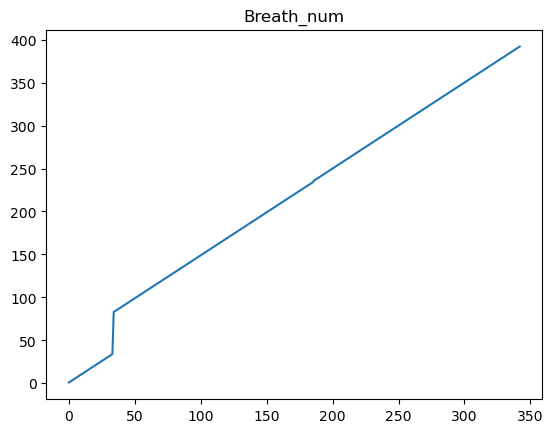

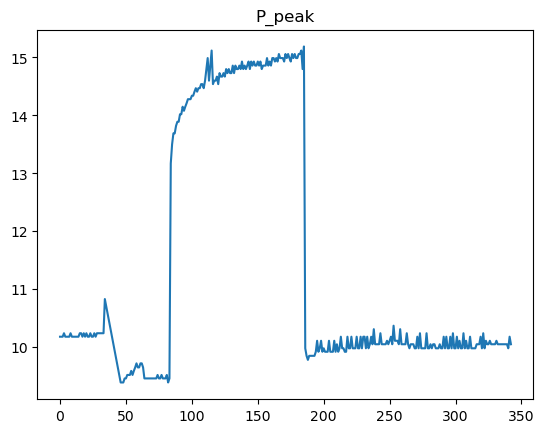

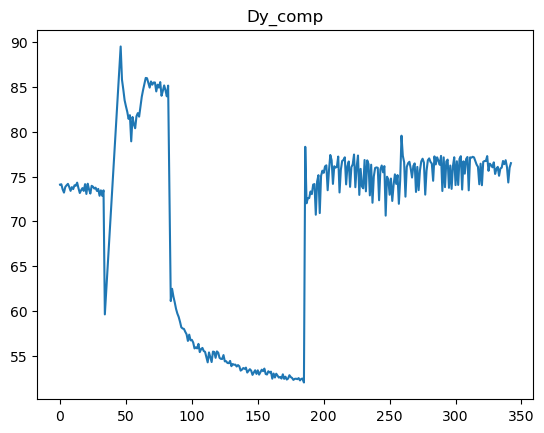

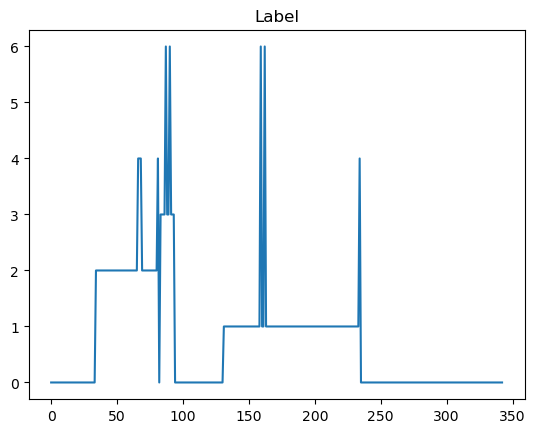

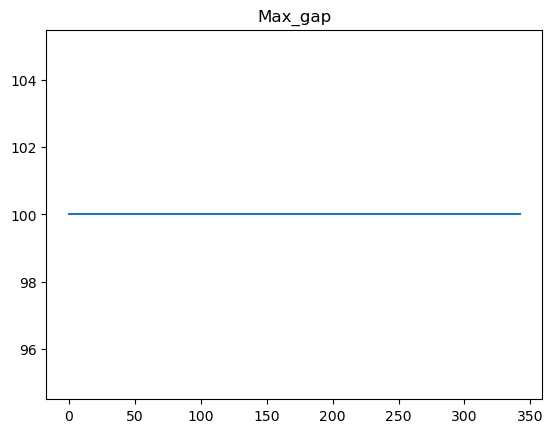

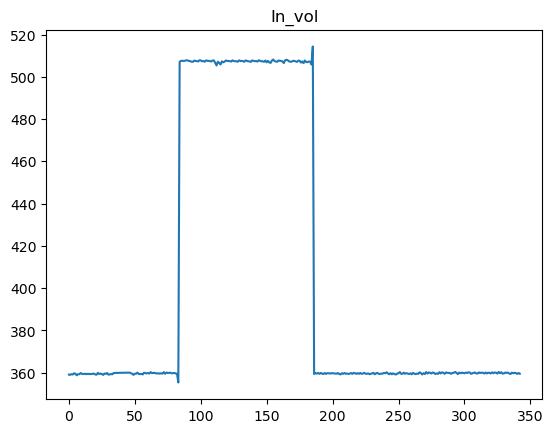

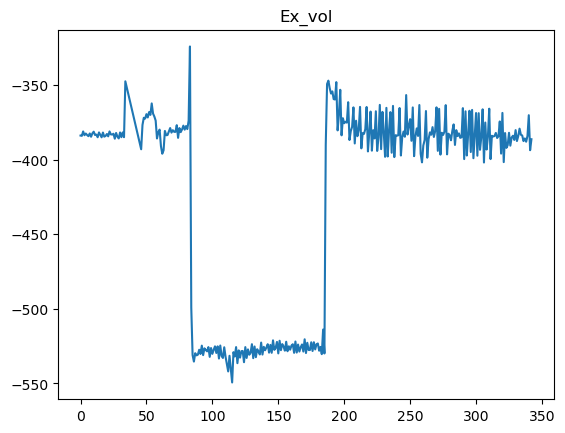

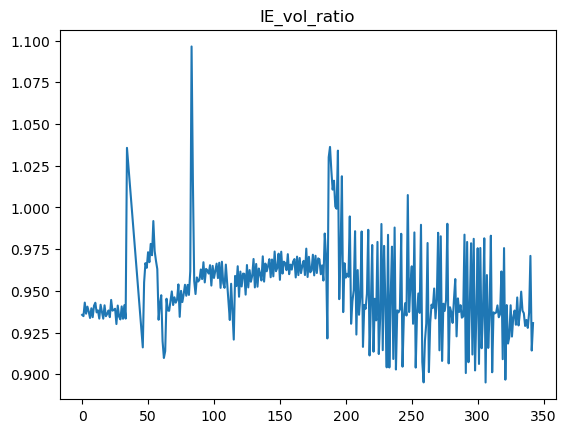

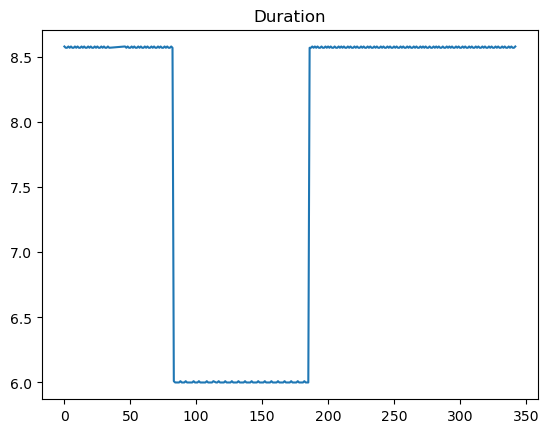

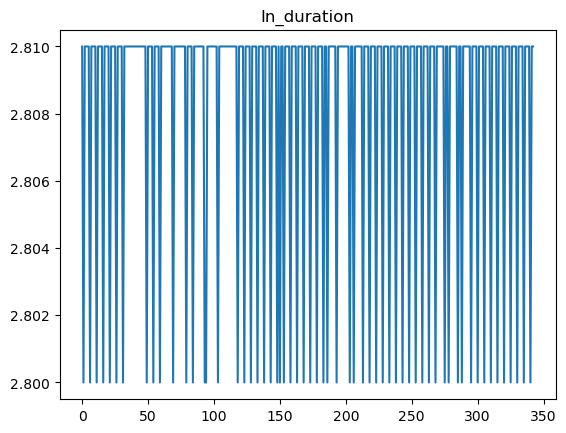

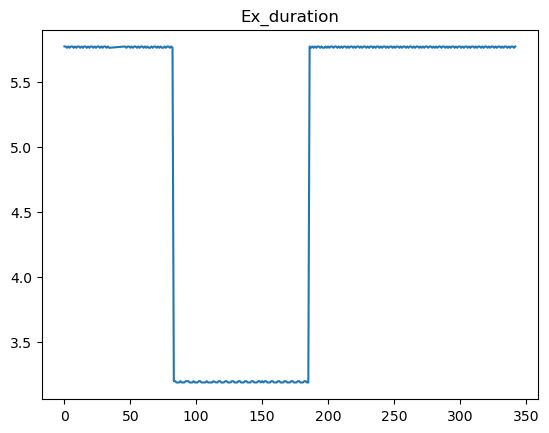

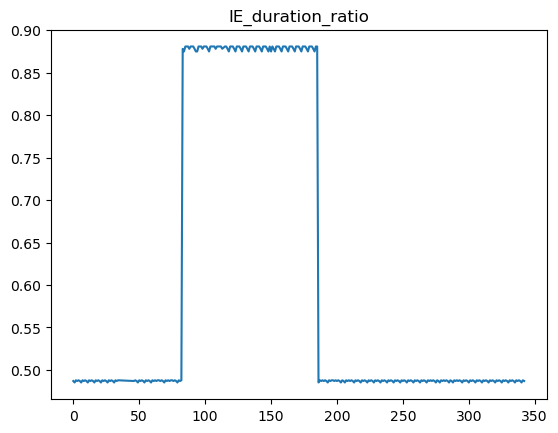

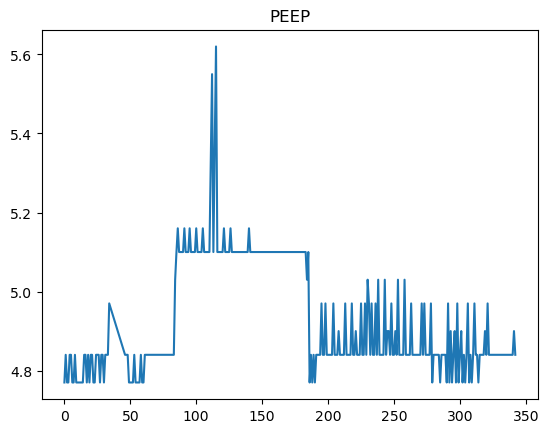

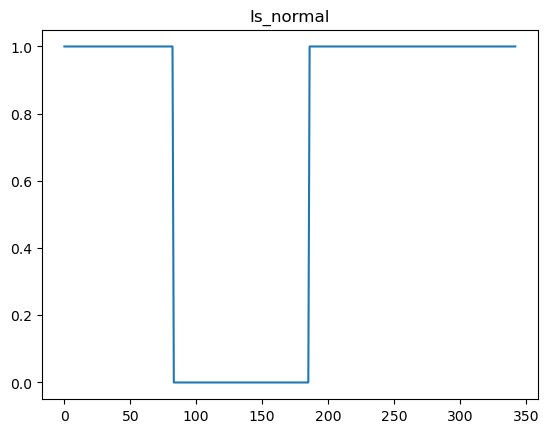

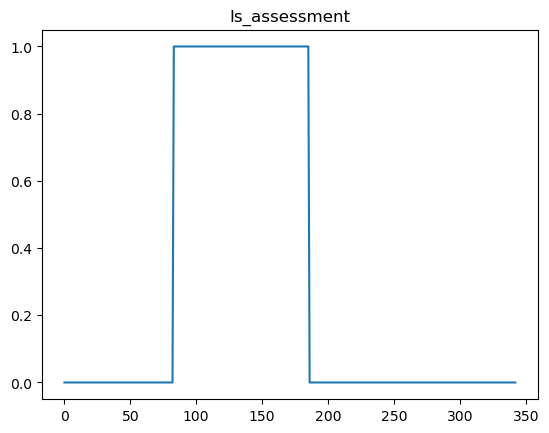

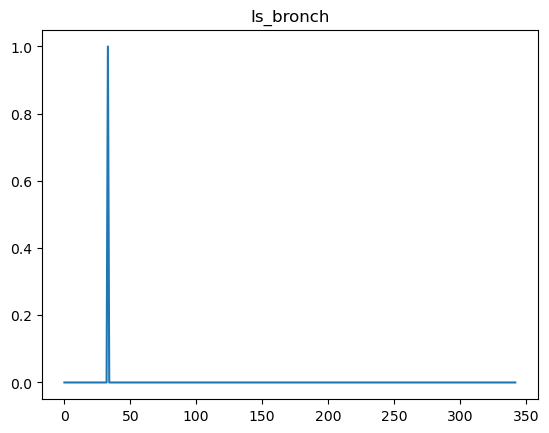

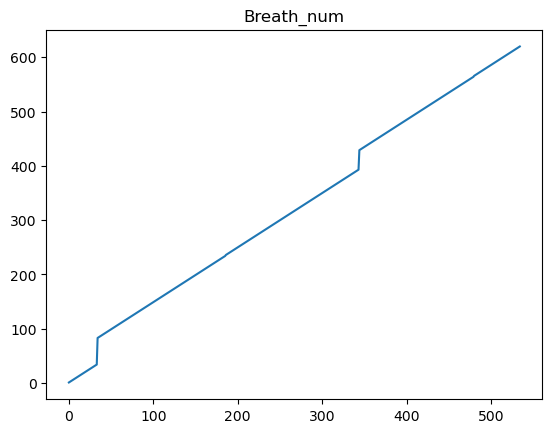

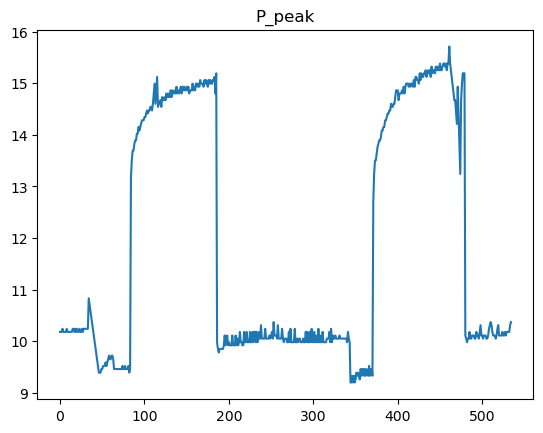

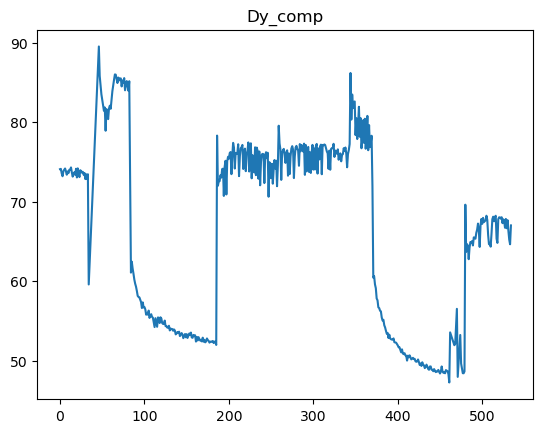

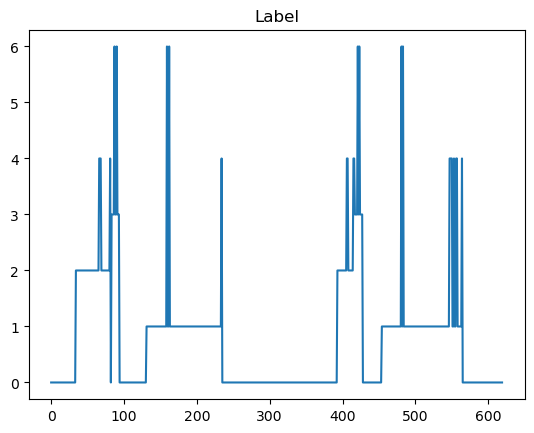

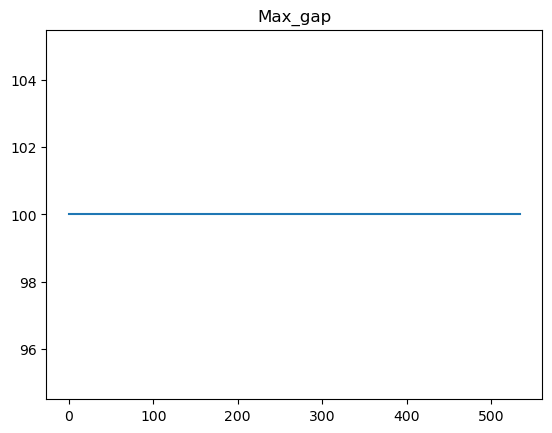

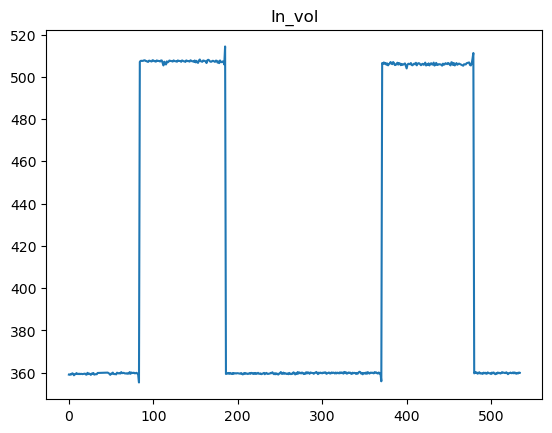

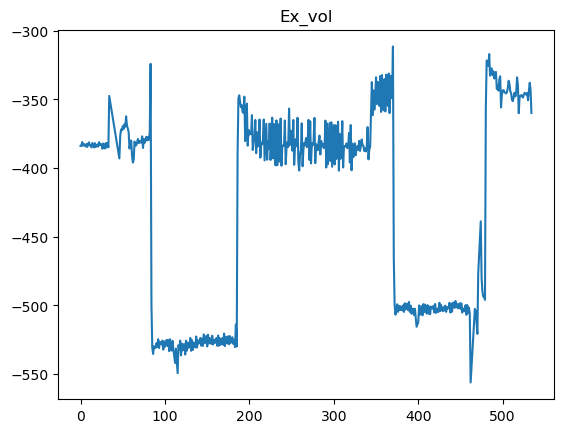

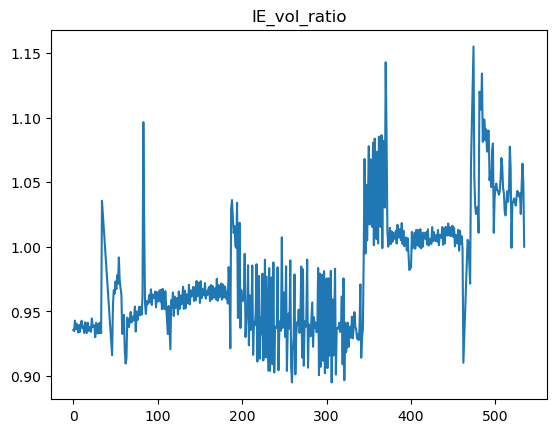

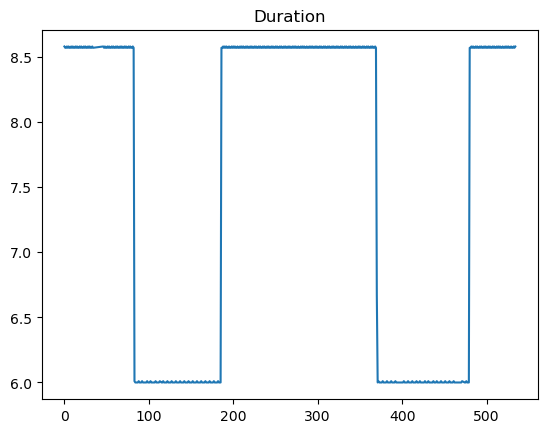

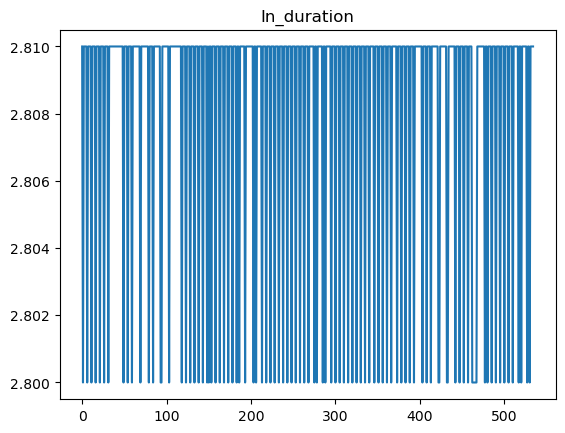

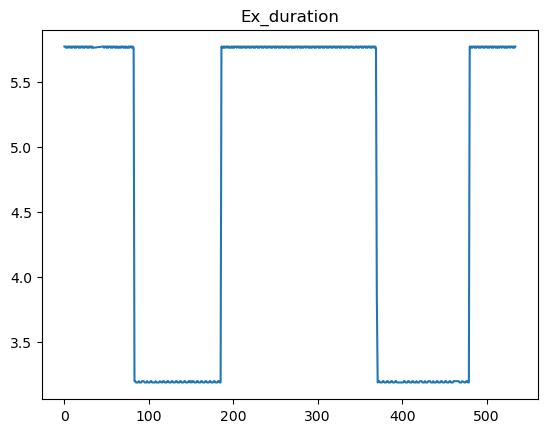

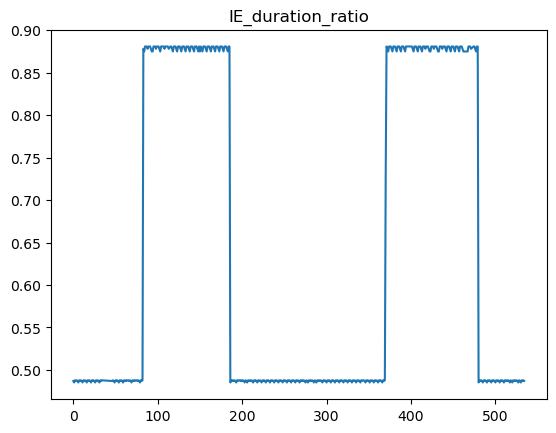

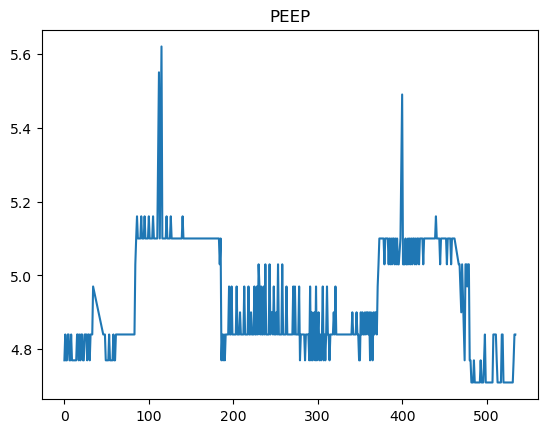

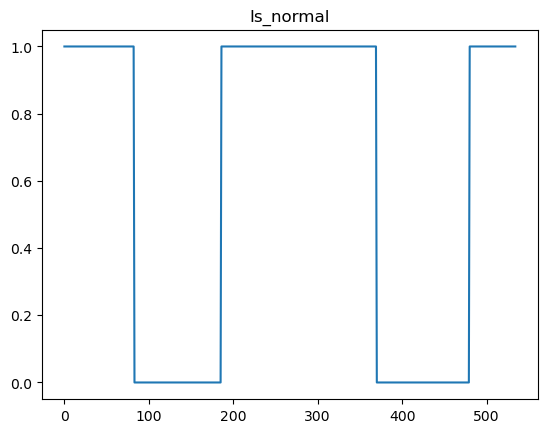

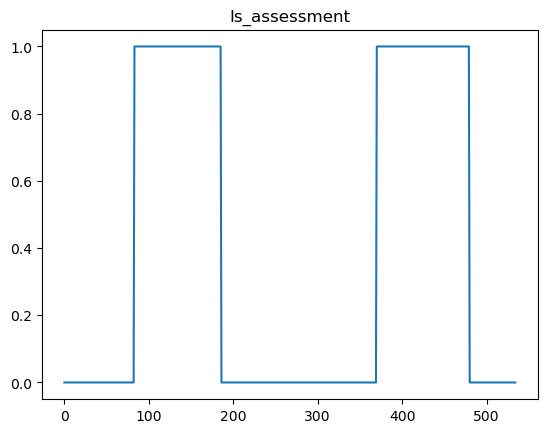

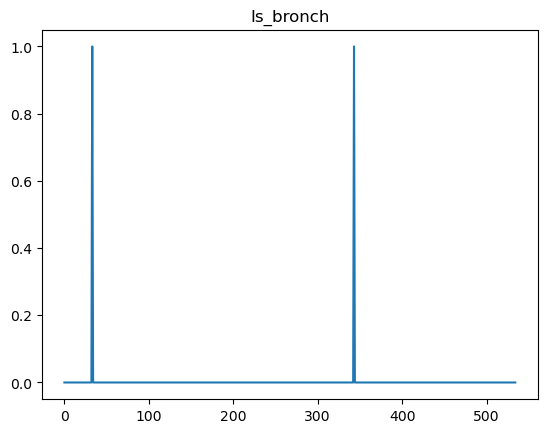

In [2]:
train_lung_ids, test_lung_ids = train_test_split(
    ALL_LUNG_IDS, test_size=2, random_state=0
)
train_lung_ids, val_lung_ids = train_test_split(
    train_lung_ids, test_size=2, random_state=0
)
# Splits result should be deterministic
assert set(val_lung_ids) == {8, 606}, str(val_lung_ids)
assert set(test_lung_ids) == {615, 731}, str(test_lung_ids)

train_dataset = ProcessedEVLPDataset(train_lung_ids)
val_dataset = ProcessedEVLPDataset(val_lung_ids)
test_dataset = ProcessedEVLPDataset(test_lung_ids)

for dataset in train_dataset, val_dataset, test_dataset:
    for element in dataset:
        if element["Lung_id"] != 579:
            continue
        for key, value in element.items():
            if key == "Lung_id" or value is None:
                continue
            plt.figure()
            plt.plot(value)
            plt.title(key)
None